Max Amp and Amp Ratio from offshore statistics and onshore statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Load common data from your selected stations
max_amp_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleve53550.offshore.txt'
waveperiod_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleveWP53550.offshore.txt'
df_amp = pd.read_csv(max_amp_file, sep='\t')
df_wp = pd.read_csv(waveperiod_file, sep='\t')
id = df_amp.iloc[:, 0]

#CT-df
st = 38 #38/41 for CT and 54 for SR
# Extract the data for the selected station
max_amp = df_amp.iloc[:, st]
waveperiod = df_wp.iloc[:, st]

max_ht_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/CHeight_CT_alleve53550.onshore.txt'
df_ht = pd.read_csv(max_ht_file, sep='\t')
max_ht = df_ht['hmax']
max_depth = df_ht['dmax']
#abs max of dzmin or dzmax
max_adz = df_ht[['dzmax', 'dzmin']].abs().max(axis=1)

# Create a DataFrame for the selected station
df = pd.DataFrame({'id': id,
                'max_amp': max_amp,
                'waveperiod': waveperiod,
                'max_ht': max_ht,
                'max_adz': max_adz,
                'max_depth': max_depth})

# Split the first 2 characters of id into a new column 'type'
df['type'] = df['id'].str[:2]
df['amp_ratio'] = df['max_ht']/df['max_amp']

#filter events with max_adz < 0.1
# df = df[df['max_adz'] < 0.1]
# df = df[df['max_amp'] > 0.1]


#SR-df2
st = 54
# Extract the data for the selected station
max_amp = df_amp.iloc[:, st]
waveperiod = df_wp.iloc[:, st]
max_ht_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/CHeight_SR_alleve53550.onshore.txt'
df2_ht = pd.read_csv(max_ht_file, sep='\t')
max_ht = df2_ht['hmax']
max_depth = df2_ht['dmax']
#abs max of dzmin or dzmax
max_adz = df2_ht[['dzmax', 'dzmin']].abs().max(axis=1)#abs max of dzmin or dzmax

# Create a DataFrame for the selected station
df2 = pd.DataFrame({'id': id,
                    'max_amp': max_amp,
                    'waveperiod': waveperiod,
                    'max_ht': max_ht,
                    'max_adz': max_adz,
                    'max_depth': max_depth})

# Split the first 2 characters of id into a new column 'type'
df2['type'] = df2['id'].str[:2]
df2['amp_ratio'] = df2['max_ht']/df2['max_amp']

#filter events with max_adz < 0.1
# df2 = df2[df2['max_adz'] < 0.1]
# df2 = df2[df2['max_amp'] > 0.1]


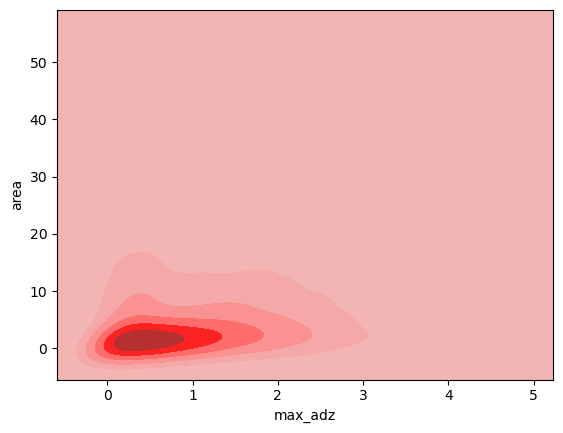

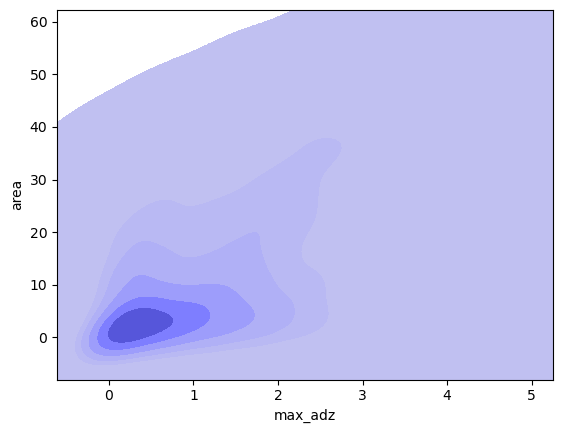

In [4]:
num_bins = 7

#merge df and df_ht as dfull
dfull = df.merge(df_ht, on='id')
dfull = dfull[dfull["max_adz"]>0.1]
dfull["count"] = dfull["count"]*0.0001

sns.kdeplot(data=dfull[(dfull["dzmin"]<-0.1)],x="max_adz", y="count",color="red",levels=7, thresh=0,fill=True, label="uplift")
plt.ylabel("area")
plt.show()
sns.kdeplot(data=dfull[(dfull["dzmax"]>0.1)],x="max_adz", y="count", color="blue",levels=7, thresh=0,fill=True,label="subsidence")
plt.ylabel("area")
plt.show()

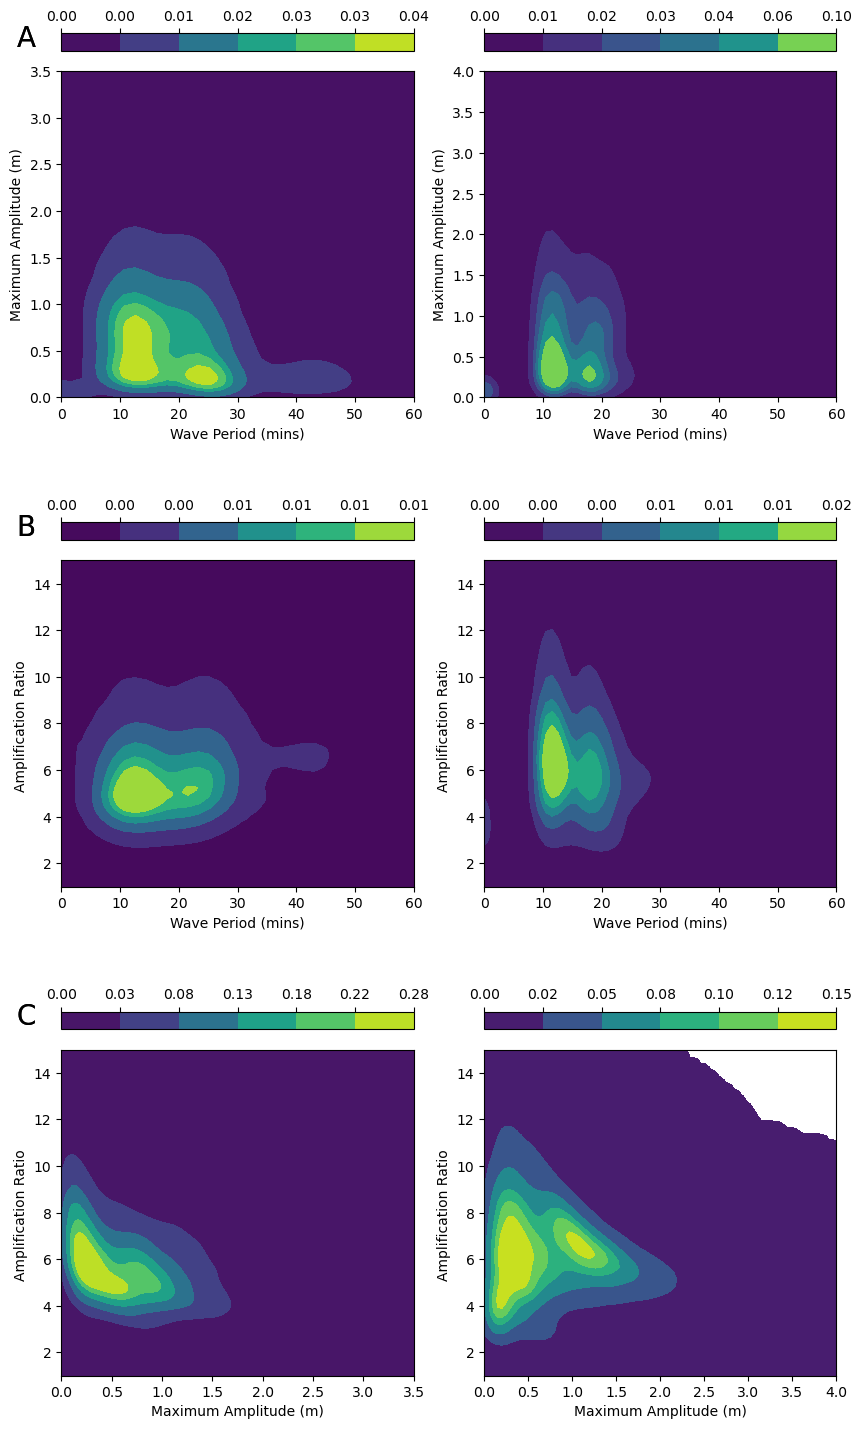

In [5]:
num_bins = 7

#combine both into one layout parallel to each other
fig, ax = plt.subplots(3,2, figsize=(10, 18))

sns.kdeplot(ax=ax[0,0], data=df, x='waveperiod', y='max_amp', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[1,0], data=df, x='waveperiod', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[2,0], data=df, x='max_amp', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))

sns.kdeplot(ax=ax[0,1], data=df2, x='waveperiod', y='max_amp', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[1,1], data=df2, x='waveperiod', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))
sns.kdeplot(ax=ax[2,1], data=df2, x='max_amp', y='amp_ratio', fill=True, thresh=0, cmap='viridis', cbar=True, levels=num_bins,cbar_kws = dict(format = '%.2f',use_gridspec=False,location="top"))

ax[0,0].set_xlim(0, 60)
ax[0,0].set_ylim(0, 3.5)
ax[0,0].set_xlabel('Wave Period (mins)')
ax[0,0].set_ylabel('Maximum Amplitude (m)')
ax[0,0].text(-0.1,1.1,'A',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)

ax[0,1].set_xlim(0, 60)
ax[0,1].set_ylim(0, 4)
ax[0,1].set_xlabel('Wave Period (mins)')
ax[0,1].set_ylabel('Maximum Amplitude (m)')
ax[0,1].text(-0.1,1.1,'A',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)

ax[1,0].set_xlim(0, 60)
ax[1,0].set_ylim(1, 15)
ax[1,0].set_xlabel('Wave Period (mins)')
ax[1,0].set_ylabel('Amplification Ratio ')
ax[1,0].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)

ax[1,1].set_xlim(0, 60)
ax[1,1].set_ylim(1, 15)
ax[1,1].set_xlabel('Wave Period (mins)')
ax[1,1].set_ylabel('Amplification Ratio ')
ax[1,1].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)

ax[2,0].set_xlim(0, 3.5)
ax[2,0].set_ylim(1, 15)
ax[2,0].set_xlabel('Maximum Amplitude (m)')
ax[2,0].set_ylabel('Amplification Ratio ')
ax[2,0].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[2,0].transAxes,fontsize=20)

ax[2,1].set_xlim(0, 4)
ax[2,1].set_ylim(1, 15)
ax[2,1].set_xlabel('Maximum Amplitude (m)')
ax[2,1].set_ylabel('Amplification Ratio ')
ax[2,1].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[2,0].transAxes,fontsize=20)

plt.savefig('./plots/distribution.png', dpi=600, bbox_inches='tight')
plt.show()


Type vs Magnitude

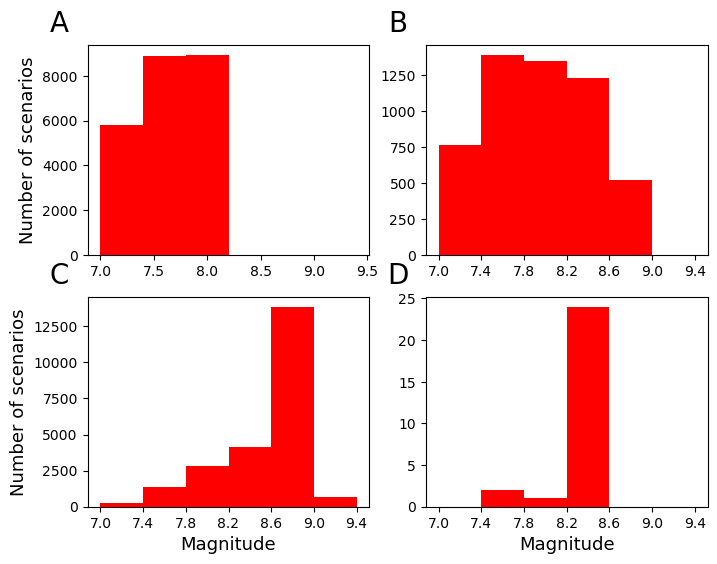

In [47]:
import matplotlib.pyplot as plt

# Read earthquake events data from txt files
data_BS = pd.read_csv('../../resources/processed/eve_BS.txt',sep='\t')
data_PS = pd.read_csv('../../resources/processed/eve_PS_SourceRegion.txt',sep='\t')

#plot historgram across source regions of the magnitude
bins = np.arange( 7.0,  9.4, 0.4)
fig, ax = plt.subplots(2,2,figsize=(8,6))

#plot as subplots
ax[0,0].hist(data_BS['Mag'], bins = np.arange( 7.0,  9.4, 0.4), facecolor='red', align='mid')
ax[0,1].hist(data_PS[data_PS['SR']=='CL']['Mag'], bins = bins, facecolor='red', align='mid')
ax[1,0].hist(data_PS[data_PS['SR']=='HL']['Mag'], bins = bins, facecolor='red', align='mid')
ax[1,1].hist(data_PS[data_PS['SR']=='CY']['Mag'], bins = bins, facecolor='red', align='mid')

ax[0,0].set_ylabel('Number of scenarios', fontsize = 13)
ax[1,0].set_ylabel('Number of scenarios', fontsize = 13)

#set common xlabel and ticks
ax[0,1].set_xticks(bins)
ax[1,0].set_xticks(bins)
ax[1,1].set_xticks(bins)
ax[1,0].set_xticks(bins)

ax[1,0].set_xlabel('Magnitude', fontsize = 13)
ax[1,1].set_xlabel('Magnitude', fontsize = 13)

#set labels
ax[0,0].text(-0.1,1.1,'A',horizontalalignment='center',verticalalignment='center',transform=ax[0,0].transAxes,fontsize=20)
ax[0,1].text(-0.1,1.1,'B',horizontalalignment='center',verticalalignment='center',transform=ax[0,1].transAxes,fontsize=20)
ax[1,0].text(-0.1,1.1,'C',horizontalalignment='center',verticalalignment='center',transform=ax[1,0].transAxes,fontsize=20)
ax[1,1].text(-0.1,1.1,'D',horizontalalignment='center',verticalalignment='center',transform=ax[1,1].transAxes,fontsize=20)

#save figure
plt.savefig('./plots/earthquake_mag.png', dpi=600, bbox_inches='tight')

Histograms / Inundation Area

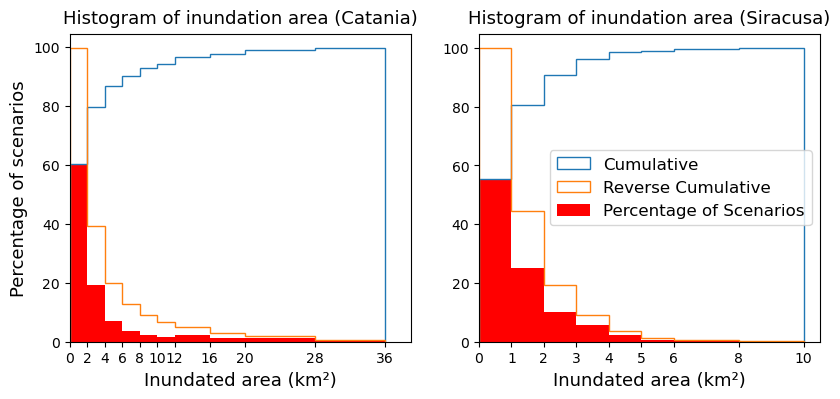

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 


#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.0, 12, 2)
bins_CT1  = np.arange( 12, 20, 4)
bins_CT2=  np.arange( 20, 42, 8)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0, 4, 1)
bins_SR1  = np.arange( 4, 6, 1)
bins_SR2=  np.arange( 6, 12, 2)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))



fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df_ht['count']*0.0001
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2_ht['count']*0.0001
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
ax1.set_xlim(0, 39)
ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Inundated area (km²)', fontsize = 13)
ax2.set_xlabel('Inundated area (km²)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.text(0.5,1.05,r'Histogram of inundation area (Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of inundation area (Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/inundation_area_hist.png', dpi=600, bbox_inches='tight')
plt.show()

Inundation Height

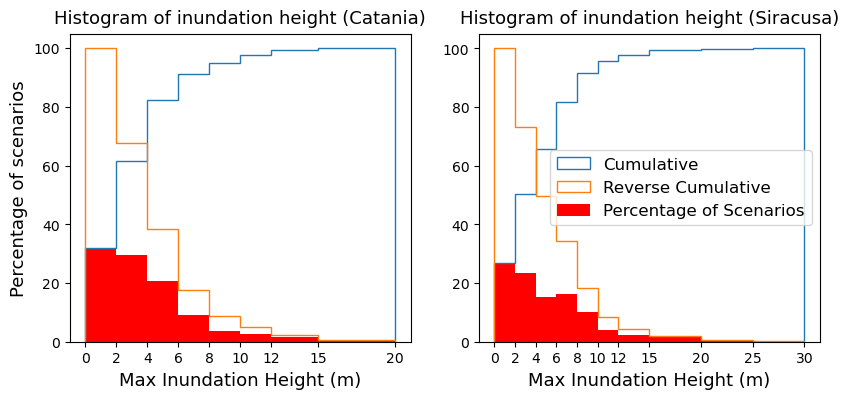

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 


#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.0, 12, 2)
bins_CT1  = np.arange( 12, 15, 3)
bins_CT2=  np.arange( 15, 25, 5)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0.0, 12, 2)
bins_SR1  = np.arange( 12, 15, 3)
bins_SR2=  np.arange( 15, 35, 5)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df_ht['hmax']
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2_ht['hmax']
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'Red',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
# ax1.set_xlim(0, 39)
# ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Max Inundation Height (m)', fontsize = 13)
ax2.set_xlabel('Max Inundation Height (m)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.text(0.5,1.05,r'Histogram of inundation height (Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of inundation height (Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/inundation_height_hist.png', dpi=600, bbox_inches='tight')
plt.show()


Historgram Offshore height 

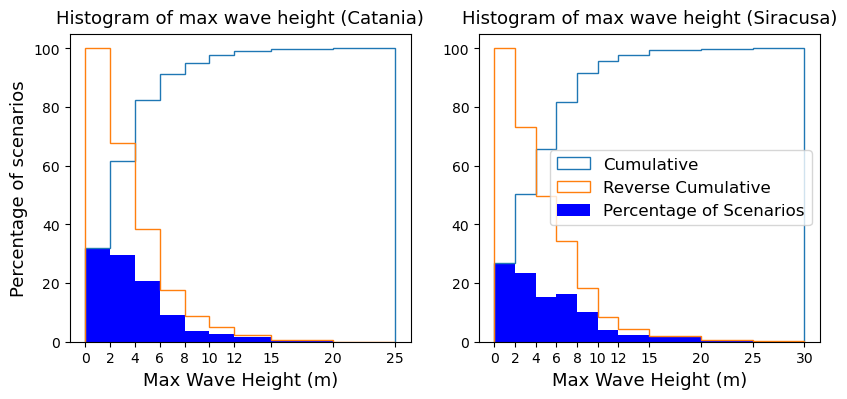

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 
#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.0, 12, 2)
bins_CT1  = np.arange( 12, 15, 3)
bins_CT2=  np.arange( 15, 30, 5)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0.0, 12, 2)
bins_SR1  = np.arange( 12, 15, 3)
bins_SR2=  np.arange( 15, 35, 5)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df['max_ht']
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'Blue',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2['max_ht']
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'Blue',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
# ax1.set_xlim(0, 39)
# ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Max Wave Height (m)', fontsize = 13)
ax2.set_xlabel('Max Wave Height (m)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.text(0.5,1.05,r'Histogram of max wave height (Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of max wave height (Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/wave_height_hist.png', dpi=600, bbox_inches='tight')
plt.show()


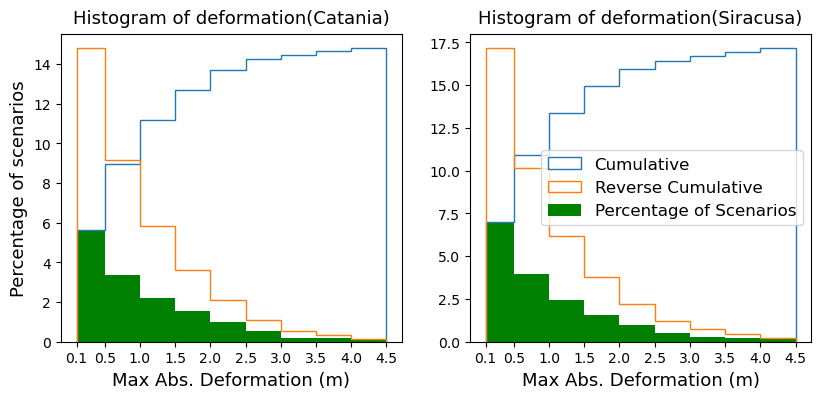

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#one grid is 10m*10m , area of 1 grid km^2 is 10*10/1000*1000 = 0.0001 km^2 


#create combination of 2 arange

# bins_CT  = np.arange( 0.0, 40.0, 6) 
bins_CT0  = np.arange( 0.1, 0.1, 0.1)
bins_CT1  = np.arange( 0.1, 0.5, 0.5)
bins_CT2=  np.arange( 0.5, 5, 0.5)
bins_CT = np.concatenate((bins_CT0, bins_CT1, bins_CT2))


bins_SR0  = np.arange( 0.1, 0.1, 0.1)
bins_SR1  = np.arange( 0.1, 0.5, 0.5)
bins_SR2=  np.arange( 0.5, 5, 0.5)
bins_SR = np.concatenate((bins_SR0,bins_SR1, bins_SR2))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


iharr_CT = df['max_adz']
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax1.hist(iharr_CT,
            weights=100.0 * np.ones(len(iharr_CT)) / len(iharr_CT),
            bins = bins_CT, align='mid', facecolor = 'green',
                             label = 'Percentage of Scenarios',
            cumulative=False)


iharr_SR = df2['max_adz']
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Cumulative',
            cumulative=True)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid',
            histtype='step', label = 'Reverse Cumulative',
            cumulative=-1)
ax2.hist(iharr_SR,
            weights=100.0 * np.ones(len(iharr_SR)) / len(iharr_SR),
            bins = bins_SR, align='mid', facecolor = 'green',
                             label = 'Percentage of Scenarios',
            cumulative=False)

ax1.set_xticks(bins_CT)
ax2.set_xticks(bins_SR)
# ax1.set_xlim(0, 39)
# ax2.set_xlim(0, 10.5)
plt.legend(loc = 'right', fontsize = 12)
ax1.set_xlabel('Max Abs. Deformation (m)', fontsize = 13)
ax2.set_xlabel('Max Abs. Deformation (m)', fontsize = 13)
ax1.set_ylabel('Percentage of scenarios', fontsize = 13)
ax1.ticklabel_format(axis='x', style='sci', scilimits=(1,0))
ax1.text(0.5,1.05,r'Histogram of deformation(Catania)',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes,fontsize=13)
ax2.text(0.5,1.05,r'Histogram of deformation(Siracusa)',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes,fontsize=13)
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.savefig('./plots/deform_hist.png', dpi=600, bbox_inches='tight')
plt.show()


In [12]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img4 = Image.open('./plots/deform_hist.png')
img3 = Image.open('./plots/wave_height_hist.png')
img2 = Image.open('./plots/inundation_height_hist.png')
img1 = Image.open('./plots/inundation_area_hist.png')

#merge to one image vertically
images = [img4, img3]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_hist1.png')

#merge to one image vertically
images = [img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_hist2.png')



In [1]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img4 = Image.open('./plots/deform_hist.png')
img3 = Image.open('./plots/wave_height_hist.png')
img2 = Image.open('./plots/inundation_height_hist.png')
img1 = Image.open('./plots/inundation_area_hist.png')

#merge to one image vertically
images = [img4, img3, img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_hist.png')


In [2]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img2 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1658_combined.png')
img1 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1773_combined.png')

#merge to one image vertically
images = [img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_result.png')


In [ ]:
#combine 2 png plots to one
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#open images
img2 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1658_combined.png')
img1 = Image.open('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/results/model_coupled_[64, 128, 256]_on[16, 128, 128]_1773_combined.png')

#merge to one image vertically
images = [img2, img1]
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Image.new('RGB', (max_width, total_height))

#set background color as white
new_im.paste((255,255,255), [0,0,max_width, total_height])


y_offset = 0
for im in images:
  new_im.paste(im, (0,y_offset))
  y_offset += im.size[1]


#save image
new_im.save('./plots/combined_trainsize.png')
